## Heat transfer model

<img src="modelg.png" width="600"/>

In [1303]:
# Fitting parameters
h1=5*60*60*24/1000     #5 W/m2K  remember timescale per day
h2=1.6*(10*60*60*24/1000)
k1=20*0.8*(0.3*60*60*24/1000)             #0.3 W/mK, 1m to Ts. kJ/m2K
k2=(10*60*60*24/1000)
a=3.9 #convert luminance to KJ inset in air
b=2.8
Ts=10.5   #soil temperature

In [1304]:
# Black best
#h1=1.9*(5*60*60*24/1000)     #10 W/m2K  remember timescale per day
#h2=1.4*(10*60*60*24/1000)
#k1=0.051*(0.3*60*60*24/1000)             #0.3 W/mK, 1m to Ts. kJ/m2K
#k2=(0.1*60*60*24/1000)

In [1305]:
h2


1382.4

In [1306]:
#h1=1296*1
#h2=987*1
#k1=26*1
#k2=8.64*1
#a=100*0.4

In [1307]:
#Area and volume quantification
L=2.3
D1=0.9 #m bag
D2=0.955*2 #m tent
Deep =0.5 #m

Vd=Deep*D1*L*0.8*1000 #liter
Ak1=L*Deep*2+D1*L*0.9 #m2
Ak2=(D2-D1)/2*L*2
Ah2=3.14*D1/2*L*0.85
Ah1=3.14*D2/2*(L+0.5)+3.14*(D2/2)**2
Vbg=3.14*((D1/2)**2)*L*0.6*1000
Vt=0.5*3.14*((D2/2)**2)*(L+0.5)*1000-Vbg


In [1308]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [1309]:
df = pandas.read_excel('Ambient10.xlsx', header=None)  # Assuming no headers
dl = pandas.read_excel('sunday.xlsx', header=None)  # Assuming no headers

black=pandas.read_excel('Black10.xlsx', header=None)  # Assuming no headers
clear=pandas.read_excel('Clear10.xlsx', header=None)  # Assuming no headers
tent=pandas.read_excel('Tent10.xlsx', header=None)

timeb=black.iloc[0, :].values.astype(float)
Tb=black.iloc[1, :].values.astype(float)

timec=clear.iloc[0, :].values.astype(float)
Tc=clear.iloc[1, :].values.astype(float)

timet=tent.iloc[0, :].values.astype(float)
Tte=tent.iloc[1, :].values.astype(float)

In [1310]:
#function for returning temperature in the day. Send time return temperature. Model starts at 12 at night

def whattemp(t):
    time = df.iloc[0, :].values.astype(float)    # First row as time
    Temp = df.iloc[1, :].values.astype(float)     # Second row as temperature
    
    frac=t-int(t) #t in days
    tt=frac*24
    result = np.interp(tt, time, Temp)
    
    return result


In [1311]:
Tb[0]

20.700296735905

In [1312]:
#function for returning luminance at time of day. Model starts at 12 at night

def whatlum(t):
    time = dl.iloc[0, :].values.astype(float)    # First row as time
    Lum =  dl.iloc[1, :].values.astype(float)     # Second row as temperature
    
    frac=t-int(t) #t in days
    tt=frac*24
    result = np.interp(tt, time, Lum)
    
    return result

In [1313]:
def ebal(t,T):
    
    Td, Tt = T[0],T[1] 
    
    Ta=whattemp(t)
    lum=whatlum(t)
    
    dTddt= (k1*Ak1*(Ts-Td)+h2*Ah2*(Tt-Td)+b*lum)/(Vd*4.187)
    
    dTtdt= (k2*Ak2*(Ts-Tt)+h1*Ah1*(Ta-Tt)+a*lum)/(Vt*1.23/1000)
    
    return [dTddt,    
            dTtdt];
           

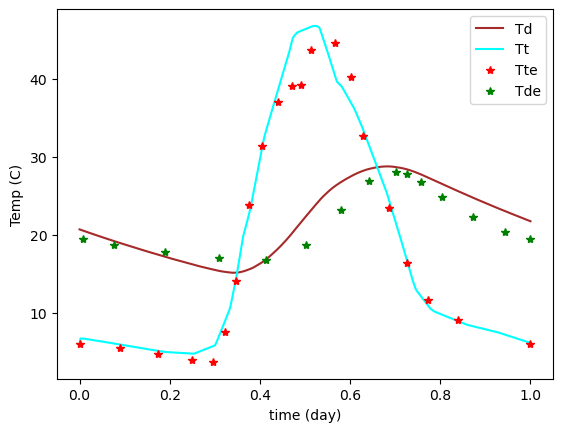

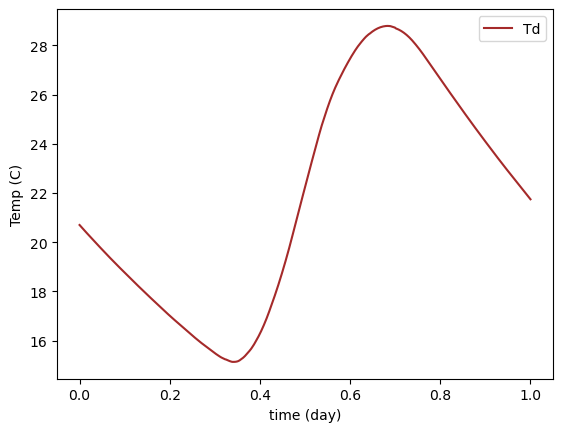

In [1314]:
To=[Tb[0],Tt[0]]                     
tmax = 1                                
tspan=np.linspace(0,tmax,500)            
tper = (0,tmax)                          

Tsolve = solve_ivp(ebal, tper, To, dense_output = True, method = "LSODA")    # integration via odeint that calls apon response_fun

Td, Tt = Tsolve.sol(tspan)

plt.figure(1)
plt.plot(tspan, Td, color='brown', label='Td')
plt.plot(tspan, Tt, color='cyan', label='Tt')
plt.plot(timet/24, Tte,'*', color='red', label='Tte')
plt.plot(timec/24, Tc,'*', color='green', label='Tde')

plt.ylabel('Temp (C)') 
plt.xlabel('time (day)') 
plt.legend(loc='best')
plt.show() 

plt.figure(2)
plt.plot(tspan, Td, color='brown', label='Td')
#plt.plot(tspan, Tt, color='cyan', label='Tt')
plt.ylabel('Temp (C)') 
plt.xlabel('time (day)') 
plt.legend(loc='best')
plt.show() 

In [994]:
#Get data:

da = pandas.read_excel('Tent Black1.xlsx', header=None)  # Assuming no headers
db = pandas.read_excel('Clear1.xlsx', header=None)  # Assuming no headers
dc = pandas.read_excel('Black1.xlsx', header=None)  # Assuming no headers

time_tent = da.iloc[0, :].values.astype(float)    # First row as time
Ttent =  da.iloc[1, :].values.astype(float)     # Second row as temperature

time_clear = db.iloc[0, :].values.astype(float)    # First row as time
Tclear =  db.iloc[1, :].values.astype(float)     # Second row as temperature

time_black = dc.iloc[0, :].values.astype(float)    # First row as time
Tblack =  dc.iloc[1, :].values.astype(float)     # Second row as temperature